In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [6]:
# What are the ten most common movie names of all time?

titles.title.value_counts().head(10)

Hamlet                  18
Carmen                  16
Macbeth                 15
The Outsider            12
Maya                    12
Freedom                 11
The Three Musketeers    11
Kismet                  11
Temptation              11
Othello                 11
Name: title, dtype: int64

In [8]:
# Which three years of the 1930s saw the most films released?

t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1196
1936    1138
1938    1130
Name: year, dtype: int64

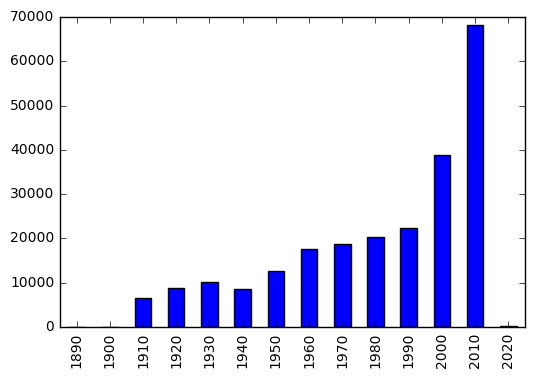

In [9]:
# Plot the number of films that have been released each decade
# over the history of cinema.

t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

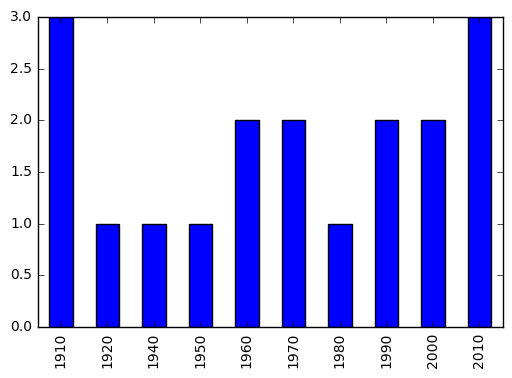

In [10]:
# Plot the number of "Hamlet" films made each decade.

t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

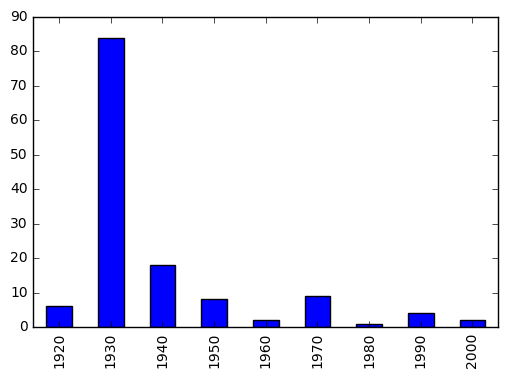

In [11]:
# Plot the number of "Rustler" characters
# in each decade of the history of film.

c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

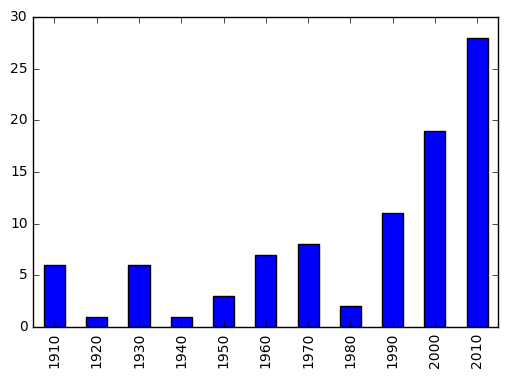

In [12]:
# Plot the number of "Hamlet" characters each decade.

c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

In [13]:
# What are the 11 most common character names in movie history?

cast.character.value_counts().head(11)

Himself        19627
Dancer         12086
Extra          10962
Reporter        8159
Doctor          7447
Student         7204
Policeman       6888
Party Guest     6782
Nurse           6688
Bartender       6622
Minor Role      6265
Name: character, dtype: int64

In [14]:
# Who are the 10 people most often credited as "Herself" in film history?

c = cast
c[c.character == 'Herself'].name.value_counts().head(10)

Queen Elizabeth II                  11
Joyce Brothers                       9
Margaret Thatcher                    8
Hillary Clinton                      7
Mary Jo Pehl                         7
Marilyn Monroe                       6
Joan Rivers                          6
Sumie Sakai                          6
Queen Elizabeth the Queen Mother     5
Bunny Yeager                         5
Name: name, dtype: int64

In [13]:
# Who are the 10 people most often credited as "Himself" in film history?

c = cast
c[c.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             91
Richard Nixon            38
Ronald Reagan            28
John F. Kennedy          26
Ron Jeremy               22
George W. Bush           20
Franklin D. Roosevelt    20
Bill Clinton             20
Winston Churchill        20
Martin Luther King       19
dtype: int64

In [14]:
# Which actors or actresses appeared in the most movies in the year 1945?

cast[cast.year == 1945].name.value_counts().head(10)

Emmett Vogan       39
Sam (II) Harris    30
Bess Flowers       28
Harold Miller      28
Nolan Leary        27
Frank O'Connor     26
Franklyn Farnum    24
Edmund Cobb        24
Tom London         24
Pierre Watkin      24
dtype: int64

In [15]:
# Which actors or actresses appeared in the most movies in the year 1985?

cast[cast.year == 1985].name.value_counts().head(10)

Shakti Kapoor       19
Mammootty           17
Sukumari            16
Lou Scheimer        15
Aruna Irani         14
Rajesh Khanna       13
Mohanlal            13
Deven Verma         13
Raj Babbar          13
Satyendra Kapoor    12
dtype: int64

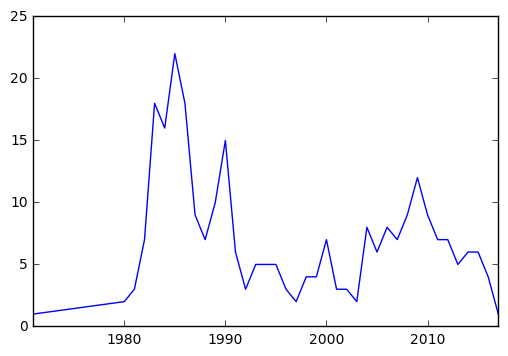

In [15]:
# Plot how many roles Mammootty has played in each year of his career.

cast[cast.name == 'Mammootty'].year.value_counts().sort_index().plot()

In [18]:
# What are the 10 most frequent roles that start with the phrase "Patron in"?

c = cast
c[c.character.str.startswith('Patron in ')].character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in restaurant             4
Patron in Bar                    4
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in booth                  2
Name: character, dtype: int64

In [18]:
# What are the 10 most frequent roles that start with the word "Science"?

c = cast
c[c.character.str.startswith('Science')].character.value_counts().head(10)

Science Teacher         53
Science Fair Student     8
Science Student          7
Science Fair Judge       6
Science Club Member      5
Science Reporter         5
Science Kid              4
Science Promo Cadet      4
Science Officer          3
Science teacher          3
dtype: int64

/Users/JF/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


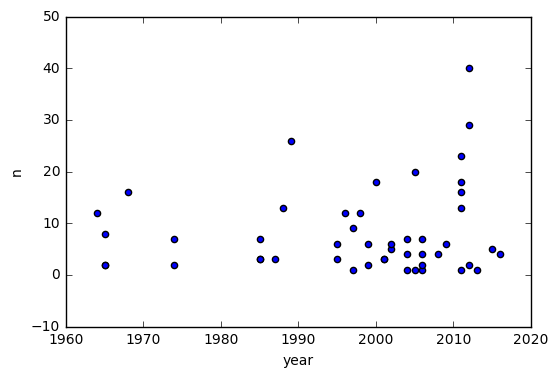

In [19]:
# Plot the n-values of the roles that Judi Dench has played over her career.

c = cast
c = c[c.name == 'Judi Dench'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

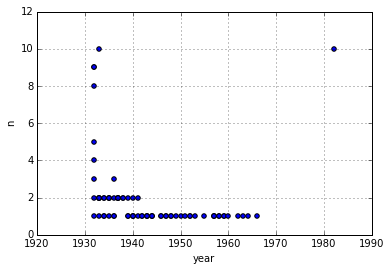

In [20]:
# Plot the n-values of Cary Grant's roles through his career.

c = cast
c = c[c.name == 'Cary Grant'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

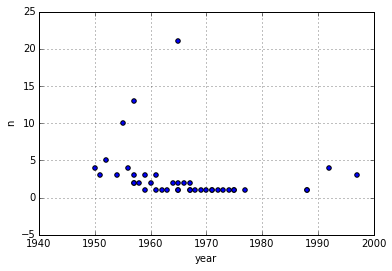

In [21]:
# Plot the n-value of the roles that Sidney Poitier has acted
# over the years.

c = cast
c = c[c.name == 'Sidney Poitier'].sort('year')
c = c[c.n.notnull()]
c.plot(x='year', y='n', kind='scatter')

In [22]:
# How many leading (n=1) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6349
actress    2789
dtype: int64

In [23]:
# How many supporting (n=2) roles were available to actors,
# and how many to actresses, in the 1950s?

c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actress    4375
actor      4354
dtype: int64